In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv("./raw_reddit_news_posts.csv")
data.head(10)

,Unnamed: 0,id,subreddit,author,created_utc,domain,url,title,num_comments,selftext,score
0,0,eib002,worldnews,DoremusJessup,2020-01-01 00:00:08,reuters.com,https://www.reuters.com/article/us-india-citiz...,Thousands of Indians ushered in the New Year b...,17,NaN,1
1,1,eib9ut,worldnews,skippy_smooth,2020-01-01 00:21:23,bgr.com,https://bgr.com/2019/12/31/china-pneumonia-sic...,A scary unidentified virus is spreading in China,70,NaN,1
2,2,eibebq,worldnews,vannybros,2020-01-01 00:31:16,cnn.com,https://www.cnn.com/2019/12/31/politics/north-...,Kim Jong Un warns hostile US policy means ther...,10,NaN,1
3,3,eibo17,worldnews,OldFashionedJizz,2020-01-01 00:53:25,theguardian.com,https://www.theguardian.com/world/2019/dec/31/...,"North Korean leader to end missile test ban, c...",7,NaN,1
4,4,eibo8f,worldnews,didnt_see_that_tree,2020-01-01 00:53:55,independent.co.uk,https://www.independent.co.uk/life-style/gadge...,Snapchat has stopped working for users around ...,8,NaN,1
5,5,eibpy7,worldnews,ScaryChange,2020-01-01 00:57:53,theverge.com,https://www.theverge.com/2019/12/31/21044876/t...,TikTok claims zero takedown requests from Chin...,32,NaN,1
6,6,eibsap,worldnews,OldFashionedJizz,2020-01-01 01:03:39,politico.com,https://www.politico.com/news/2019/12/31/trump...,Trump tries to avoid his own Benghazi. Defense...,56,NaN,1
7,7,eibvju,worldnews,Arnhem_Umbra,2020-01-01 01:11:25,abc11.com,https://abc11.com/politics/82nd-airborne-divis...,82nd Airborne Division preparing for deploymen...,70,NaN,1
8,8,eibwzq,worldnews,shill_hunter_x,2020-01-01 01:14:52,militarytimes.com,https://www.militarytimes.com/flashpoints/2020...,750 soldiers with 82nd Airborne headed for CEN...,500,NaN,1
9,9,eic74m,worldnews,discrepancy_dial,2020-01-01 01:39:48,abc.net.au,https://www.abc.net.au/news/2020-01-01/smoke-s...,Australia's bushfire smoke spreads to NZ as Ca...,625,NaN,1


In [56]:
data.count()

Unnamed: 0      136481
id              136481
subreddit       136481
author          136481
created_utc     136481
domain          136480
url             136480
title           136481
num_comments    136481
selftext          1087
score           136481
dtype: int64

## Text Analysis

### Plotting 'title' character length

<AxesSubplot: >

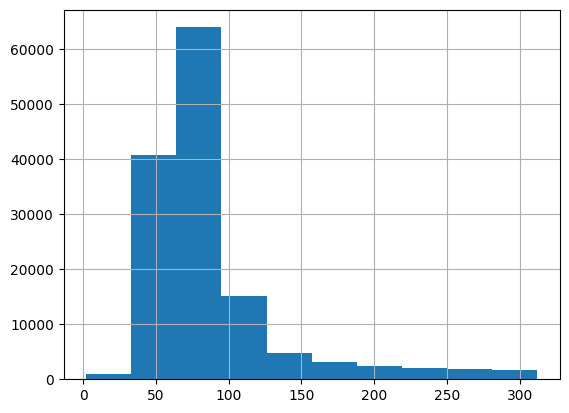

In [4]:
data['title'].str.len().hist()

### Plotting 'title' word count

<AxesSubplot: >

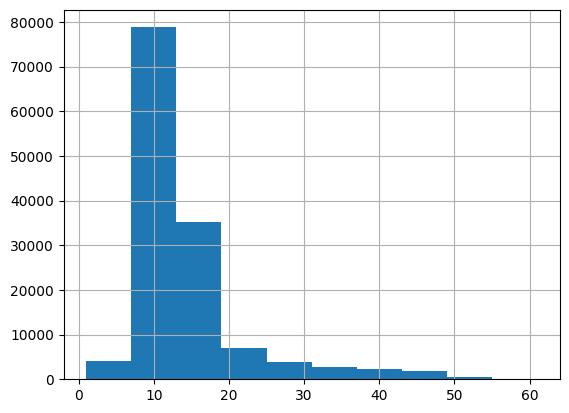

In [5]:
data['title'].str.split().map(lambda x: len(x)).hist()

### Plotting average word length in 'title'

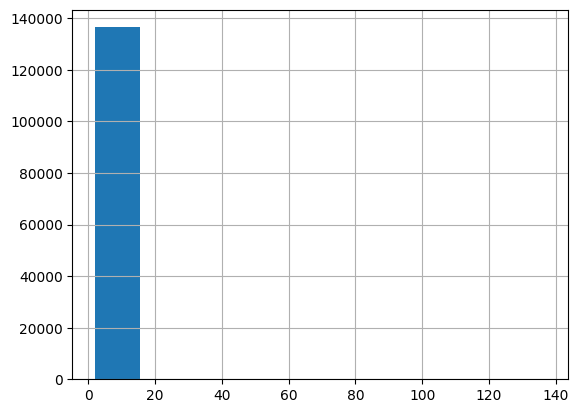

In [6]:
average_word_length = data['title'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

#### We can see that there is one outlier while observing average character length, average word count and average word length. Let us find more about the outlier.

In [7]:
data['title'].str.split().map(lambda x: len(x)).describe()

count    136481.000000
mean         13.670621
std           7.699343
min           1.000000
25%           9.000000
50%          11.000000
75%          15.000000
max          61.000000
Name: title, dtype: float64

In [8]:
data['title'].str.split().map(lambda x: len(x)).idxmax()

4207

In [9]:
data['title'][4207]

'\'You have not seen anything yet,\' climate activist Greta says ahead of Davos | “To the world leaders and those in power, I would like to say that you have not seen anything yet. You have not seen the last of us, we can assure you that. And that is the message that we will bring to the WEF in Davos."'

## Analysing stop words

In [26]:
import nltk
from nltk.corpus import stopwords

In [27]:
stop = set(stopwords.words('english'))

In [42]:
corpus = []
new = data['title'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

In [43]:
from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

<BarContainer object of 10 artists>

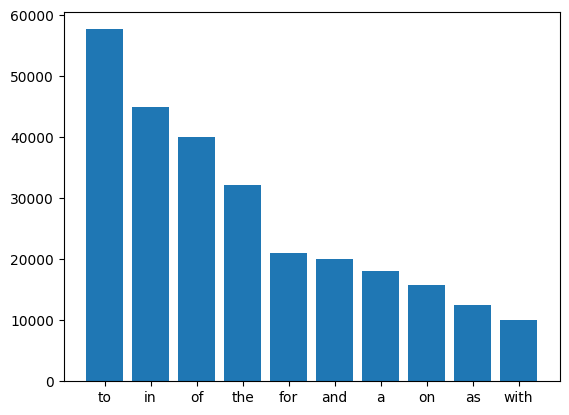

In [46]:
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

### Analysing words that are not stopwords

In [52]:
from collections import Counter
counter = Counter(corpus)
most = counter.most_common()

<AxesSubplot: >

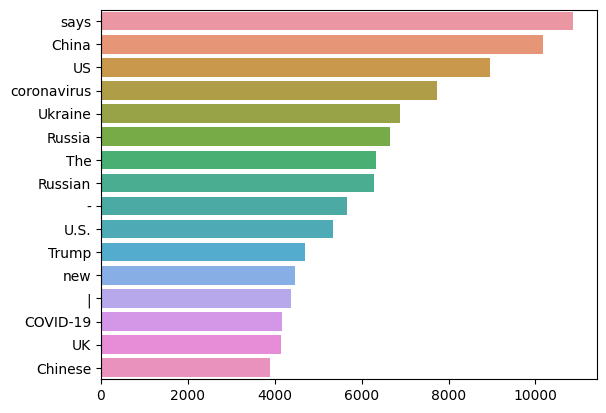

In [57]:
x,y = [], []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y, y=x)

## Analysing N-grams in the 'title'

In [61]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:10]

#### Analysing bi-grams

<AxesSubplot: >

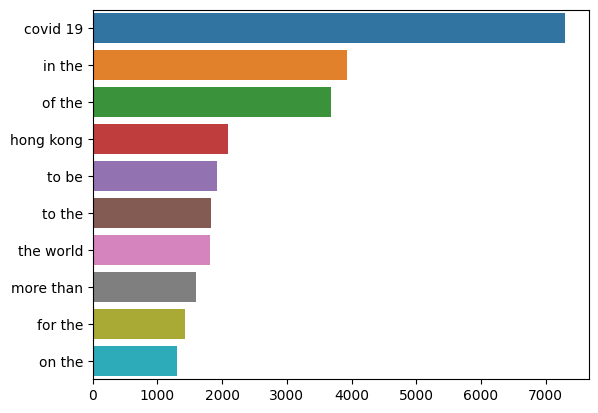

In [66]:
top_n_bigrams = get_top_ngrams(data['title'], 2)[:10]
x, y = map(list, zip(*top_n_bigrams))
sns.barplot(x=y, y=x)

#### Analysing tri-grams

<AxesSubplot: >

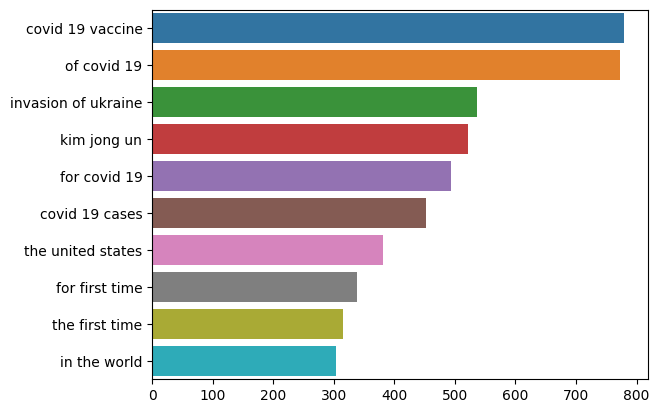

In [69]:
top_tri_grams=get_top_ngrams(data['title'], n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

## Analysing score of posts

In [75]:
data['score'].describe()

count    136481.000000
mean         84.791663
std        1824.819375
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max      142729.000000
Name: score, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x143d7cd90>,
 'caps': [<matplotlib.lines.Line2D at 0x143d1d6c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x143d7c0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1440d20e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1440d0d60>],
 'means': []}

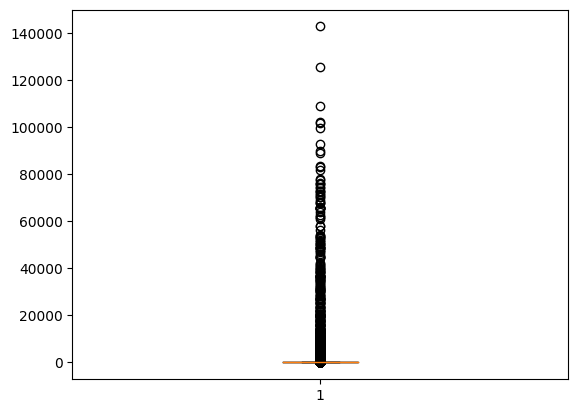

In [80]:
plt.boxplot(data['score'])

## Analysing user interaction on the basis of 'num_comments'

In [81]:
data['num_comments'].describe()

count    136481.000000
mean        156.787208
std         744.672530
min           6.000000
25%          10.000000
50%          20.000000
75%          55.000000
max       44767.000000
Name: num_comments, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x144e691b0>,
 'caps': [<matplotlib.lines.Line2D at 0x144e696f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x144e68e50>],
 'medians': [<matplotlib.lines.Line2D at 0x144e69c30>],
 'fliers': [<matplotlib.lines.Line2D at 0x144e69e10>],
 'means': []}

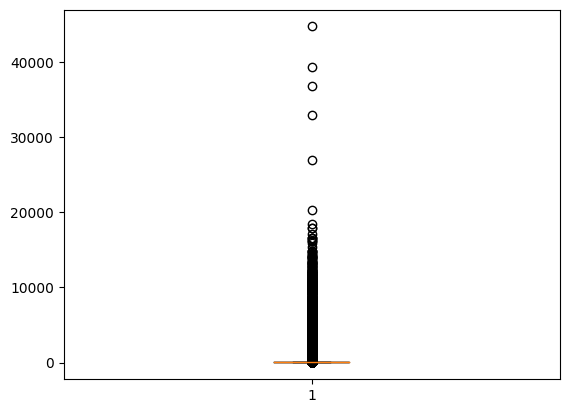

In [82]:
plt.boxplot(data['num_comments'])

### Analysing number of posts monthwise

In [89]:
data.groupby(pd.PeriodIndex(data['created_utc'], freq="M"))['created_utc'].count()

created_utc
2020-01     6915
2020-02     5193
2020-03     7632
2020-04     6995
2020-05     5324
2020-06     5376
2020-07     5706
2020-08     4675
2020-09     3961
2020-10     4251
2020-11     4576
2020-12     4884
2021-01     4545
2021-02     3789
2021-03     2625
2021-04     4458
2021-05     5895
2021-06     5026
2021-07     4695
2021-08     5423
2021-09     4746
2021-10     4254
2021-11     3832
2021-12     1677
2022-01       60
2022-02     8789
2022-03    11141
2022-04       35
2022-09        3
Freq: M, Name: created_utc, dtype: int64